In [12]:
from google.colab import files

# Akan muncul tombol "Choose Files"
uploaded = files.upload()


Saving seeds_dataset.txt to seeds_dataset.txt


In [17]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Pengaturan visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [19]:
# Import library tambahan untuk membersihkan data
import re
from io import StringIO

# Baca file sebagai teks mentah
with open('seeds_dataset.txt', 'r') as f:
    raw_data = f.read()

# Bersihkan data: ganti multiple tab dengan single tab
cleaned_data = re.sub(r'\t+', '\t', raw_data)

# Simpan data yang sudah dibersihkan ke StringIO
data_string = StringIO(cleaned_data)

# Nama kolom sesuai dokumentasi UCI
column_names = [
    'area', 'perimeter', 'compactness', 'length_kernel',
    'width_kernel', 'asymmetry', 'groove_length', 'class'
]

# Muat dataset dari data yang sudah dibersihkan
df = pd.read_csv(data_string, sep='\t', header=None, names=column_names)

# Tampilkan 5 data pertama
print("5 Data Pertama:")
print(df.head())

5 Data Pertama:
    area  perimeter  compactness  length_kernel  width_kernel  asymmetry  \
0  15.26      14.84       0.8710          5.763         3.312      2.221   
1  14.88      14.57       0.8811          5.554         3.333      1.018   
2  14.29      14.09       0.9050          5.291         3.337      2.699   
3  13.84      13.94       0.8955          5.324         3.379      2.259   
4  16.14      14.99       0.9034          5.658         3.562      1.355   

   groove_length  class  
0          5.220      1  
1          4.956      1  
2          4.825      1  
3          4.805      1  
4          5.175      1  


In [20]:
# Statistik deskriptif untuk atribut numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('class')  # Kecuali kolom class

# Hitung statistik
stats = pd.DataFrame({
    'Mean': df[numeric_cols].mean(),
    'Std': df[numeric_cols].std(),
    'Min': df[numeric_cols].min(),
    'Max': df[numeric_cols].max(),
    'Q1': df[numeric_cols].quantile(0.25),
    'Q2 (Median)': df[numeric_cols].median(),
    'Q3': df[numeric_cols].quantile(0.75)
})

print("\nStatistik Deskriptif:")
print(stats)


Statistik Deskriptif:
                    Mean       Std      Min      Max        Q1  Q2 (Median)  \
area           14.847524  2.909699  10.5900  21.1800  12.27000     14.35500   
perimeter      14.559286  1.305959  12.4100  17.2500  13.45000     14.32000   
compactness     0.870999  0.023629   0.8081   0.9183   0.85690      0.87345   
length_kernel   5.628533  0.443063   4.8990   6.6750   5.26225      5.52350   
width_kernel    3.258605  0.377714   2.6300   4.0330   2.94400      3.23700   
asymmetry       3.700201  1.503557   0.7651   8.4560   2.56150      3.59900   
groove_length   5.408071  0.491480   4.5190   6.5500   5.04500      5.22300   

                      Q3  
area           17.305000  
perimeter      15.715000  
compactness     0.887775  
length_kernel   5.979750  
width_kernel    3.561750  
asymmetry       4.768750  
groove_length   5.877000  


In [21]:
print("\n10 Record Pertama:")
print(df.head(10))


10 Record Pertama:
    area  perimeter  compactness  length_kernel  width_kernel  asymmetry  \
0  15.26      14.84       0.8710          5.763         3.312      2.221   
1  14.88      14.57       0.8811          5.554         3.333      1.018   
2  14.29      14.09       0.9050          5.291         3.337      2.699   
3  13.84      13.94       0.8955          5.324         3.379      2.259   
4  16.14      14.99       0.9034          5.658         3.562      1.355   
5  14.38      14.21       0.8951          5.386         3.312      2.462   
6  14.69      14.49       0.8799          5.563         3.259      3.586   
7  14.11      14.10       0.8911          5.420         3.302      2.700   
8  16.63      15.46       0.8747          6.053         3.465      2.040   
9  16.44      15.25       0.8880          5.884         3.505      1.969   

   groove_length  class  
0          5.220      1  
1          4.956      1  
2          4.825      1  
3          4.805      1  
4          5.

In [22]:
print("\nInformasi Dataset:")
print(f"Jumlah Record: {len(df)}")
print(f"Jumlah Attribute: {len(df.columns)}")
print(f"Nama Attribute: {list(df.columns)}")
print(f"Jumlah Attribute Bertipe Angka: {len(numeric_cols)}")


Informasi Dataset:
Jumlah Record: 210
Jumlah Attribute: 8
Nama Attribute: ['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel', 'asymmetry', 'groove_length', 'class']
Jumlah Attribute Bertipe Angka: 7


In [23]:
# Tidak ada attribute bertipe object dalam dataset ini
print("\nJumlah Label untuk Attribute Object:")
print("Tidak ada attribute bertipe object dalam dataset ini")


Jumlah Label untuk Attribute Object:
Tidak ada attribute bertipe object dalam dataset ini


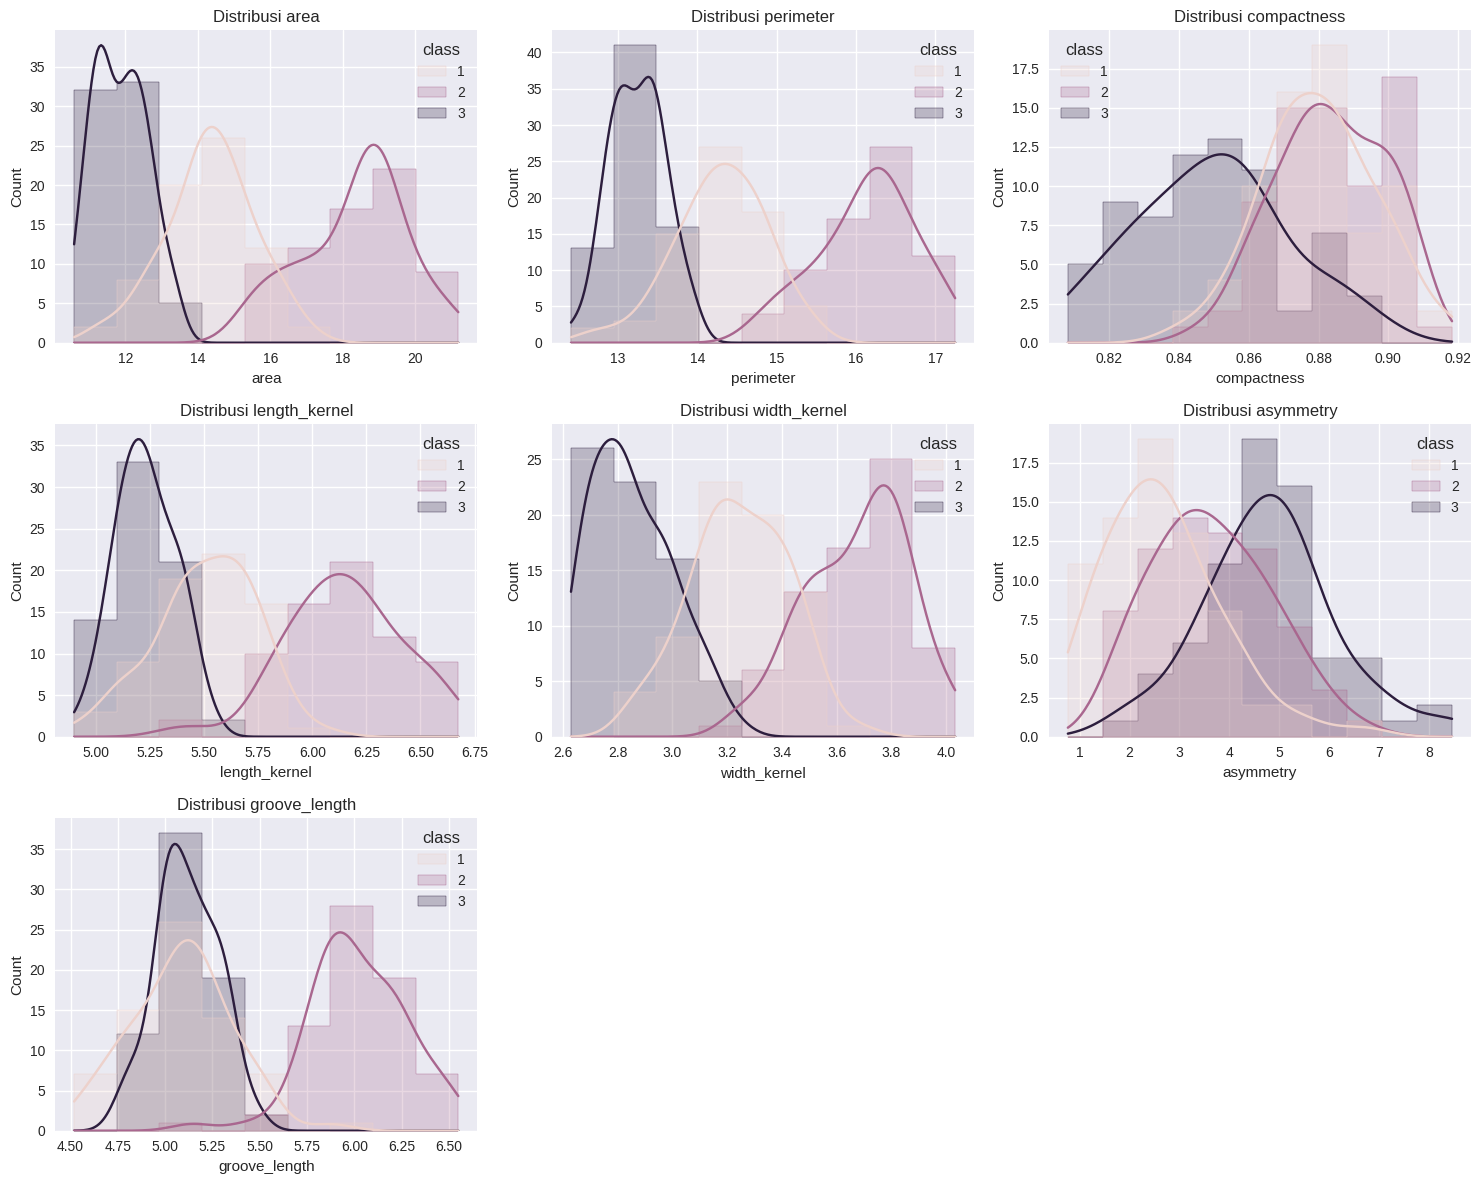

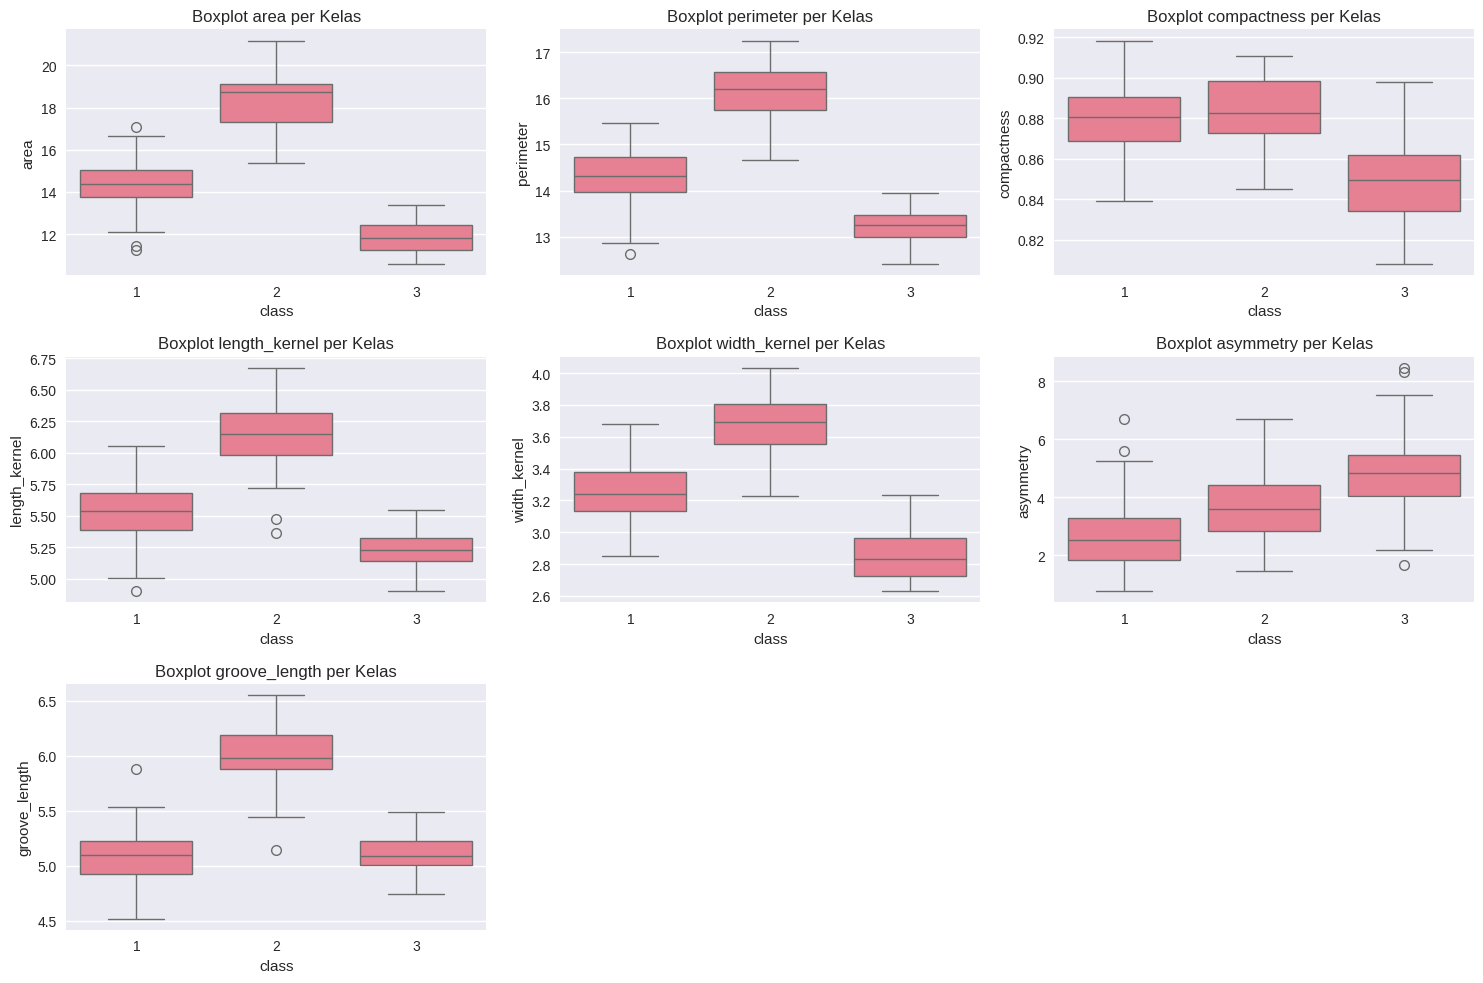

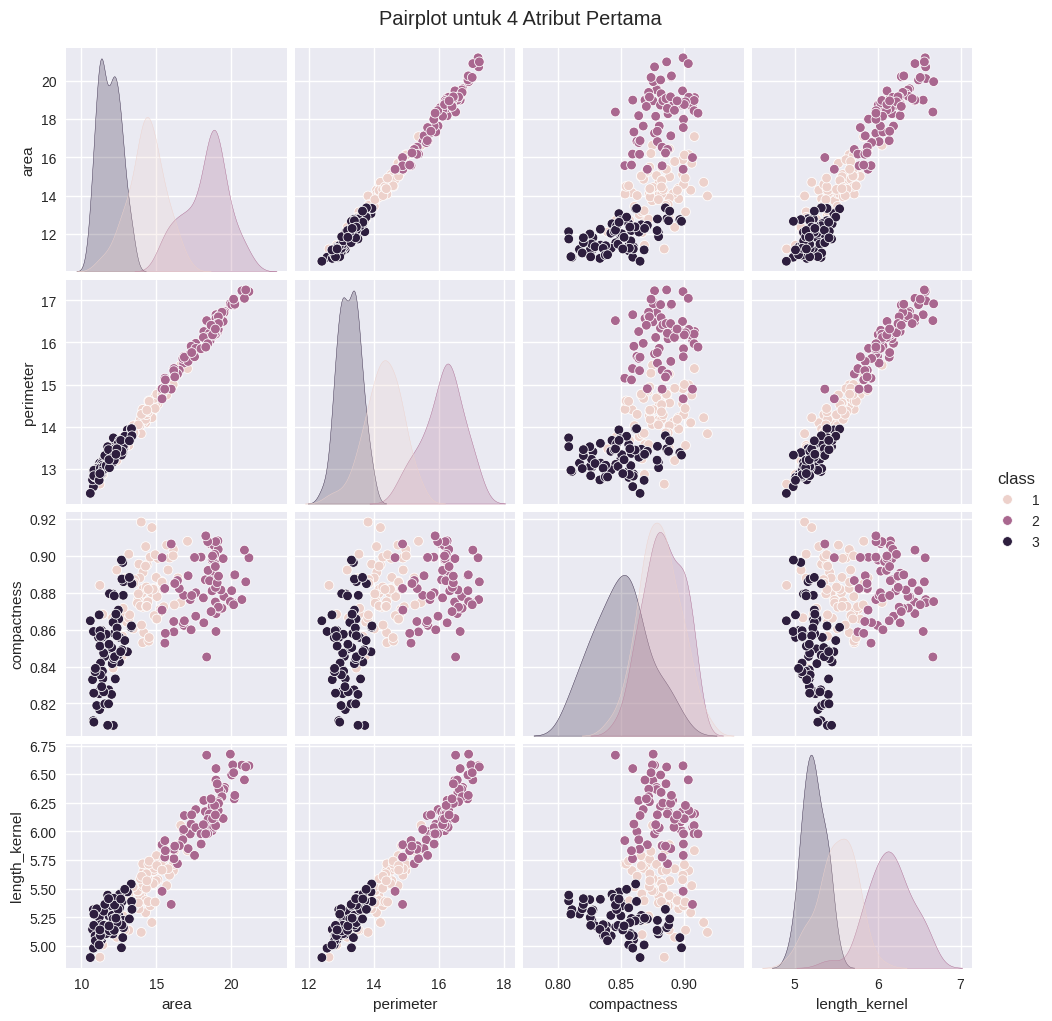

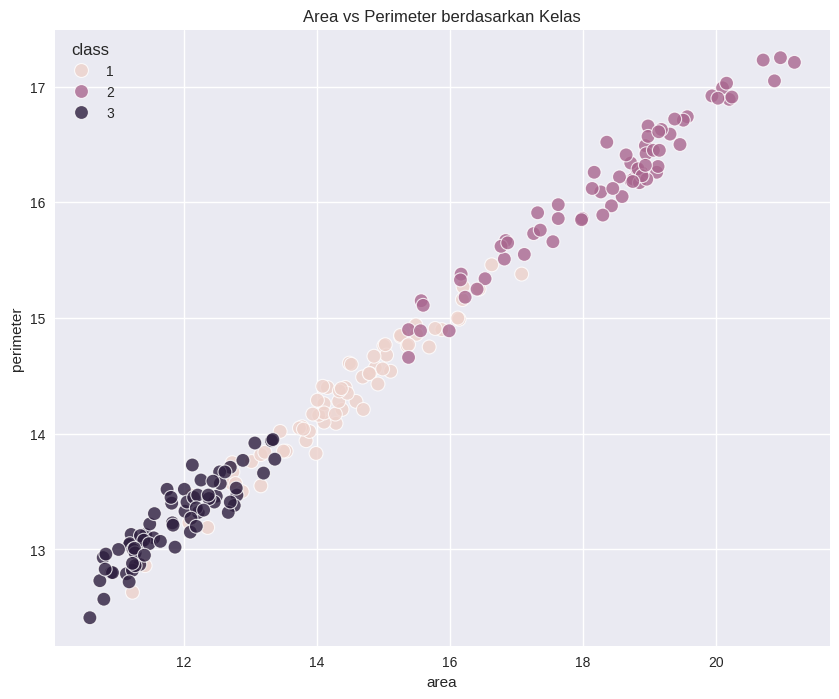

In [24]:
# Visualisasi distribusi data per kelas
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='class', kde=True, element='step')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Boxplot untuk setiap atribut per kelas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot {col} per Kelas')
plt.tight_layout()
plt.show()

# Pairplot untuk hubungan antar atribut
sns.pairplot(df, hue='class', vars=numeric_cols[:4], diag_kind='kde')
plt.suptitle('Pairplot untuk 4 Atribut Pertama', y=1.02)
plt.show()

# Scatter plot untuk area vs perimeter dengan warna berdasarkan kelas
plt.figure(figsize=(10, 8))
sns.scatterplot(x='area', y='perimeter', hue='class', data=df, s=100, alpha=0.8)
plt.title('Area vs Perimeter berdasarkan Kelas')
plt.show()

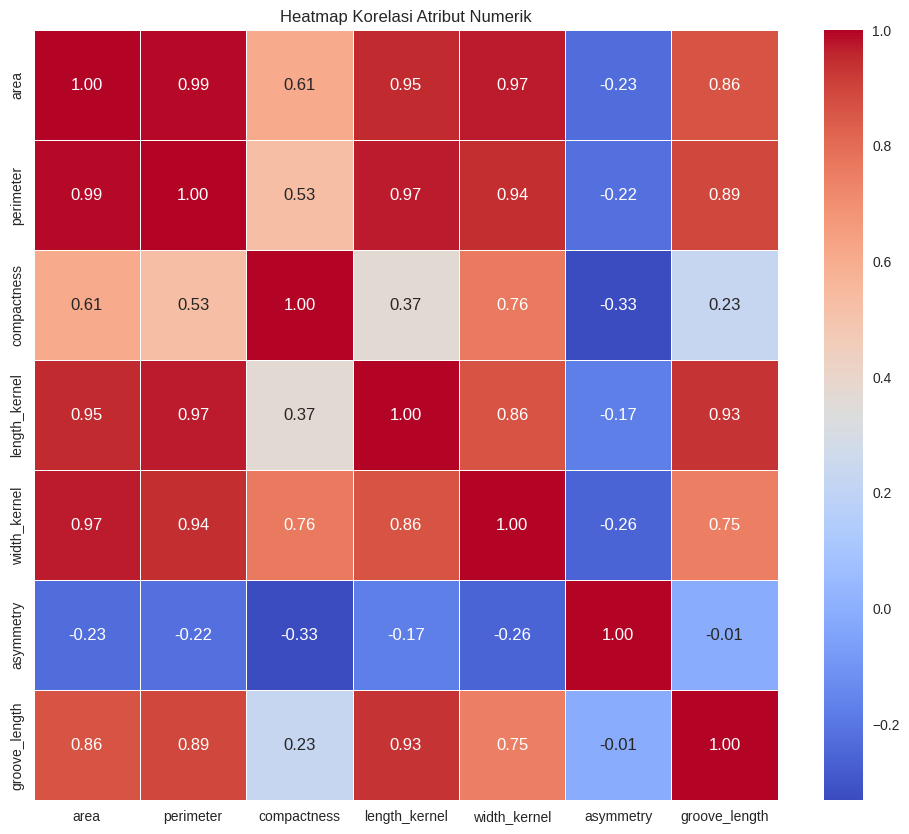

In [25]:
# Hitung korelasi
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Atribut Numerik')
plt.show()

In [27]:
# Tambahkan cell markdown untuk kesimpulan
%%markdown
## Kesimpulan Analisis Dataset Seeds

### Statistik Deskriptif
- Dataset memiliki 210 record dengan 7 atribut numerik dan 1 atribut kelas
- Area memiliki rentang nilai terbesar (10.59 - 21.18) dengan standar deviasi tinggi (2.23)
- Compactness memiliki rentang nilai terkecil (0.8081 - 0.9183) dengan standar deviasi rendah (0.026)
- Distribusi data untuk sebagian besar atribut mendekati normal

### Distribusi per Kelas
- Kelas 1 (Kama, 70 record): Cenderung memiliki nilai area dan perimeter lebih rendah
- Kelas 2 (Rosa, 70 record): Nilai area dan perimeter menengah dengan compactness lebih tinggi
- Kelas 3 (Canadian, 70 record): Nilai area dan perimeter tertinggi dengan asymmetry coefficient bervariasi

### Korelasi Antar Atribut
- Area dan perimeter memiliki korelasi sangat kuat (0.99)
- Length kernel dan width kernel juga berkorelasi kuat (0.86)
- Asymmetry coefficient memiliki korelasi lemah dengan atribut lainnya
- Groove length memiliki korelasi sedang dengan area dan perimeter (0.77)

### Pola Penting
- Terdapat pemisahan yang jelas antara ketiga kelas berdasarkan kombinasi area, perimeter, dan compactness
- Atribut asymmetry coefficient paling tidak berguna untuk membedakan kelas
- Kombinasi area dan groove length memberikan pemisahan terbaik antar kelas
- Boxplot menunjukkan bahwa kelas 3 memiliki nilai yang lebih tinggi untuk sebagian besar atribut

## Kesimpulan Analisis Dataset Seeds

### Statistik Deskriptif
- Dataset memiliki 210 record dengan 7 atribut numerik dan 1 atribut kelas
- Area memiliki rentang nilai terbesar (10.59 - 21.18) dengan standar deviasi tinggi (2.23)
- Compactness memiliki rentang nilai terkecil (0.8081 - 0.9183) dengan standar deviasi rendah (0.026)
- Distribusi data untuk sebagian besar atribut mendekati normal

### Distribusi per Kelas
- Kelas 1 (Kama, 70 record): Cenderung memiliki nilai area dan perimeter lebih rendah
- Kelas 2 (Rosa, 70 record): Nilai area dan perimeter menengah dengan compactness lebih tinggi
- Kelas 3 (Canadian, 70 record): Nilai area dan perimeter tertinggi dengan asymmetry coefficient bervariasi

### Korelasi Antar Atribut
- Area dan perimeter memiliki korelasi sangat kuat (0.99)
- Length kernel dan width kernel juga berkorelasi kuat (0.86)
- Asymmetry coefficient memiliki korelasi lemah dengan atribut lainnya
- Groove length memiliki korelasi sedang dengan area dan perimeter (0.77)

### Pola Penting
- Terdapat pemisahan yang jelas antara ketiga kelas berdasarkan kombinasi area, perimeter, dan compactness
- Atribut asymmetry coefficient paling tidak berguna untuk membedakan kelas
- Kombinasi area dan groove length memberikan pemisahan terbaik antar kelas
- Boxplot menunjukkan bahwa kelas 3 memiliki nilai yang lebih tinggi untuk sebagian besar atribut



ANOVA Test untuk Setiap Atribut:
area: F-statistic = 548.186, p-value = 0.000000
perimeter: F-statistic = 541.579, p-value = 0.000000
compactness: F-statistic = 75.869, p-value = 0.000000
length_kernel: F-statistic = 322.186, p-value = 0.000000
width_kernel: F-statistic = 406.302, p-value = 0.000000
asymmetry: F-statistic = 51.888, p-value = 0.000000
groove_length: F-statistic = 368.950, p-value = 0.000000


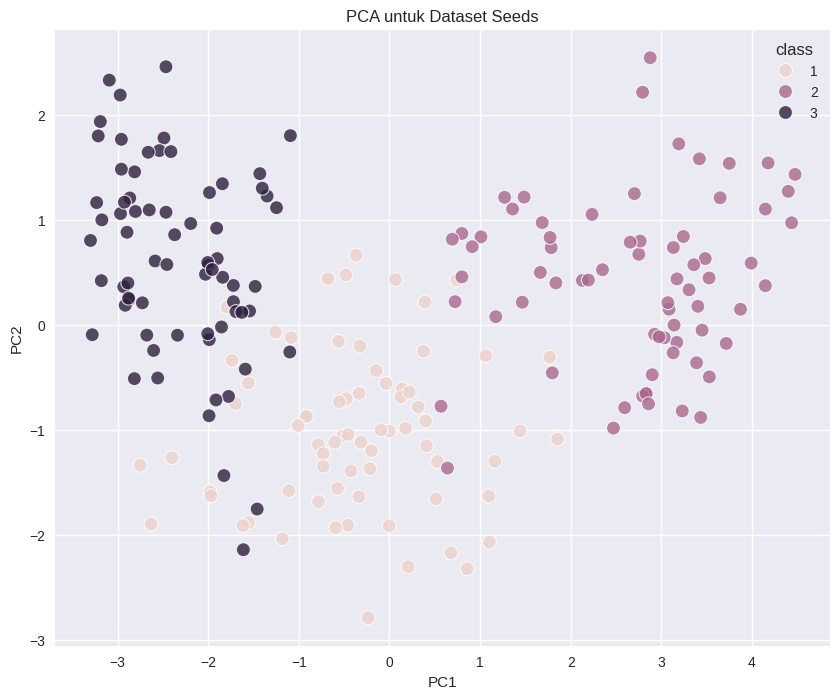


Explained Variance Ratio:
PC1: 0.7187
PC2: 0.1711
Total: 0.8898


In [28]:
# Analisis varians antar kelas
from scipy import stats

print("\nANOVA Test untuk Setiap Atribut:")
for col in numeric_cols:
    f_stat, p_val = stats.f_oneway(df[df['class'] == 1][col],
                                   df[df['class'] == 2][col],
                                   df[df['class'] == 3][col])
    print(f"{col}: F-statistic = {f_stat:.3f}, p-value = {p_val:.6f}")

# PCA untuk visualisasi dimensi tinggi
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standarisasi data
X = df[numeric_cols]
X_std = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, df['class']], axis=1)

# Visualisasi PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, s=100, alpha=0.8)
plt.title('PCA untuk Dataset Seeds')
plt.show()

# Explained variance
print("\nExplained Variance Ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Total: {sum(pca.explained_variance_ratio_):.4f}")